In [1]:
from sklearn.datasets import make_regression
import numpy as np

# Dataset generation

In [6]:
X,y = make_regression(n_samples = 100,n_features = 1,n_informative = 1, n_targets=1,noise=20)

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [42]:
y_train.shape

(80,)

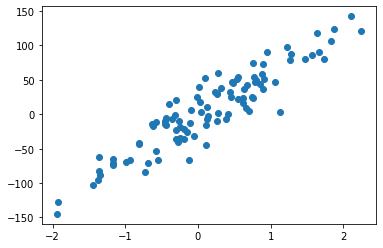

In [7]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

# Linear Regression on the dataset to check its coefficient and intercept

In [43]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[58.92454916]
-1.0913852124649157


In [44]:
from sklearn.metrics import r2_score
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.9100665906294932

In [45]:
np.mean(cross_val_score(lr,X,y,scoring='r2',cv=10))

0.8088953725113319

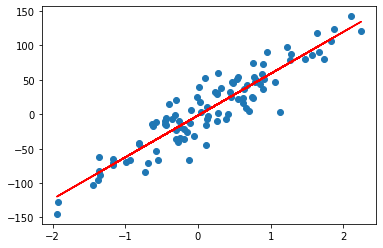

In [9]:
plt.scatter(X,y)
plt.plot(X,lr.predict(X),color='red')

In [ ]:
#slope = -2*np.sum(y-m*X-b)
#b = b-lr*slope

In [10]:
m = 60.76

# Code for Gradient descent Regressor

In [32]:
desclass GDRegressor:
    
    def __init__(self,learning_rate,epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X,y):
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y- self.m*X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y- self.m*X.ravel() - self.b) * X.ravel())
            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
            #print(loss_slope,self.b)
        print(self.m, self.b)
        
    def predict(self,X):
        return self.m*X + self.b
        

In [33]:
gd = GDRegressor(0.001,50)

In [46]:
gd.fit(X_train,y_train)

58.92903169443665 -1.0932693394170965


In [31]:
from sklearn.model_selection import cross_val_score

In [48]:
y_pred_gd= gd.predict(X_test)

In [49]:
r2_score(y_test,y_pred_gd)

0.9100831896455871